### _V18_ $ $ Der Germanium-Detektor

#### Vorläufige Auswertung

##### Pakete importieren

In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from uncertainties import ufloat
import uncertainties.unumpy as unp
from uncertainties.unumpy import nominal_values as noms, std_devs as stds, uarray as uar

plt.rcParams['figure.figsize']                 = [8,5]
plt.rcParams['figure.constrained_layout.use']  = True
plt.rcParams['legend.frameon']                 = False
plt.rcParams["xtick.minor.visible"]            = True
plt.rcParams["ytick.minor.visible"]            = True

##### Messdaten einlesen

In [2]:
eu = np.genfromtxt('data/eu.Spe', unpack=True, skip_header=12, skip_footer=14)
cs = np.genfromtxt('data/cs.Spe', unpack=True, skip_header=12, skip_footer=14)
ba_sb = np.genfromtxt('data/test/ba_sb.Spe', unpack=True, skip_header=12, skip_footer=14)
unknown = np.genfromtxt('data/test/unknown.Spe', unpack=True, skip_header=12, skip_footer=14)

##### Messzeiten einlesen

In [3]:
t_eu = np.genfromtxt('data/test/eu.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]
t_cs = np.genfromtxt('data/test/cs.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]
t_ba_sb = np.genfromtxt('data/test/ba_sb.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]
t_unknown = np.genfromtxt('data/test/unknown.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]

#### Eu-152

##### Peaks zuordnen

Peaks: 21



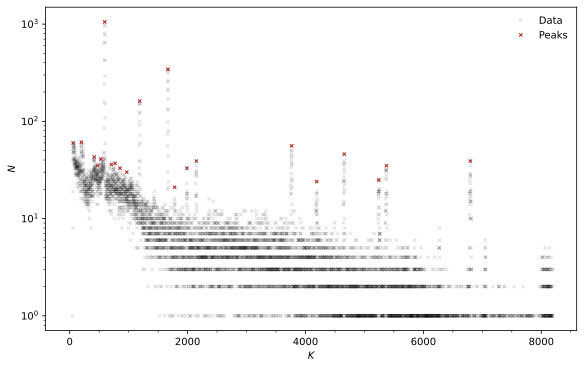

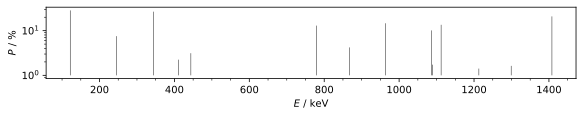

In [4]:
eu_E, eu_P = np.genfromtxt('data/eu-lit.txt', unpack=True)

eu_K = np.arange(len(eu))

eu_peak_ind = find_peaks(eu, distance=50, prominence=20)[0]
eu_peak = eu[eu_peak_ind]
eu_K_peak = eu_K[eu_peak_ind]

print(f'Peaks: {len(eu_peak_ind)}\n')
    
plt.plot(eu_K, eu, 'kx', ms=3.21, alpha=0.125, label='Data')
plt.plot(eu_K_peak, eu_peak, 'x', c='firebrick', ms=3.21, label='Peaks')

plt.xlabel(r'$K$')
plt.ylabel(r'$N$')
plt.yscale('log')
plt.legend()

plt.show()
plt.close()

plt.figure(figsize=[8, 1.5])

plt.vlines(eu_E, 1, eu_P * 100, 'k', lw=0.45)

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$P$ / %')
plt.yscale('log')

plt.show()
plt.close()

eu_peak_ass = eu_peak[np.array([5, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20])]
eu_K_peak_ass = eu_K_peak[np.array([5, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20])]
eu_E_ass = eu_E[np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13])]
eu_P_ass = eu_P[np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13])]

##### Energie kalibrieren

Linear Fit: E(K) = aK + b

a = ( 0.2073 +- 0.0001) keV
b = (-1.3399 +- 0.2191) keV


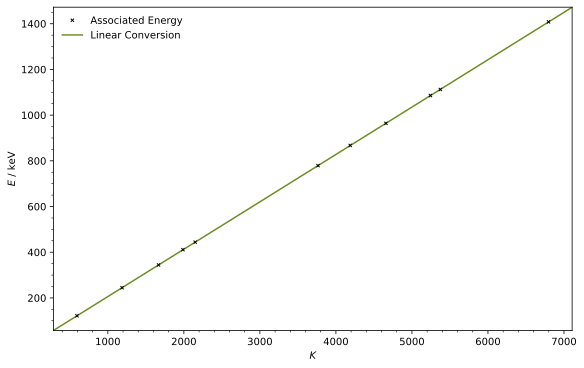

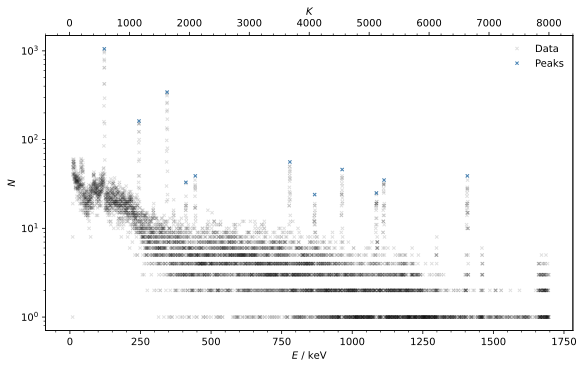

In [5]:
par, cov = np.polyfit(eu_K_peak_ass, eu_E_ass, deg=1, cov=True)
err = np.sqrt(np.diag(cov))

a = ufloat(par[0], err[0])
b = ufloat(par[1], err[1])

print(f'Linear Fit: E(K) = aK + b\n')
print(f'a = ( {a.n:.4f} +- {a.s:.4f}) keV')
print(f'b = ({b.n:.4f} +- {b.s:.4f}) keV')

def E(K):
    return a.n * K + b.n

plt.plot(eu_K_peak_ass, eu_E_ass, 'kx', ms=3.21, zorder=10, label='Associated Energy')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

x = np.array([-1e4, +1e4])

plt.plot(x, E(x), c='olivedrab', zorder=0, label='Linear Conversion')

plt.xlabel(r'$K$')
plt.ylabel(r'$E$ / keV')
plt.legend()

plt.show()
plt.close()

eu_K_in_E = E(eu_K)
eu_K_peak_ass_in_E = E(eu_K_peak_ass)

plt.plot(eu_K_in_E, eu, 'kx', ms=3.21, alpha=0.125, label='Data')
plt.plot(eu_K_peak_ass_in_E, eu_peak_ass, 'x', c='steelblue', ms=3.21, label='Peaks')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.gca().twiny()
plt.plot(eu_K[[0, 8000]], eu[[0, 8000]], alpha=0)

plt.xlabel(r'$K$')
plt.yscale('log')

plt.show()
plt.close()

##### Peaks modellieren

Gaussian Fit:

b =   27.333 +- 1.188
m =  121.807 +- 0.004
s =    0.615 +- 0.004
N = 1536.091 +- 9.780


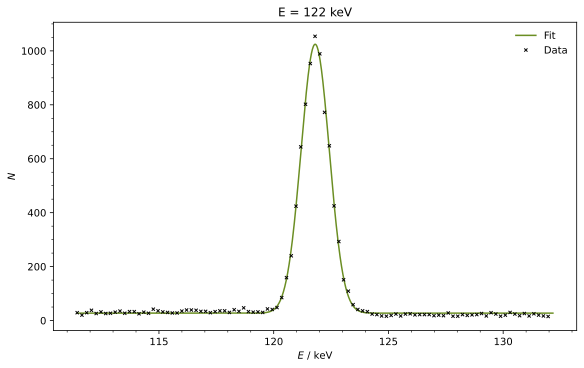

Gaussian Fit:

b =   12.202 +- 0.449
m =  244.670 +- 0.011
s =    0.681 +- 0.011
N =  253.913 +- 3.895


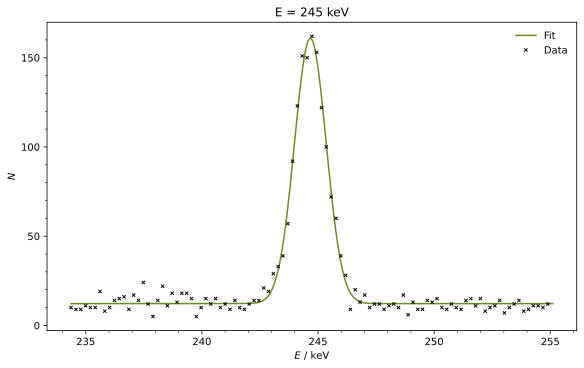

Gaussian Fit:

b =    6.960 +- 0.633
m =  344.175 +- 0.007
s =    0.746 +- 0.007
N =  623.790 +- 5.743


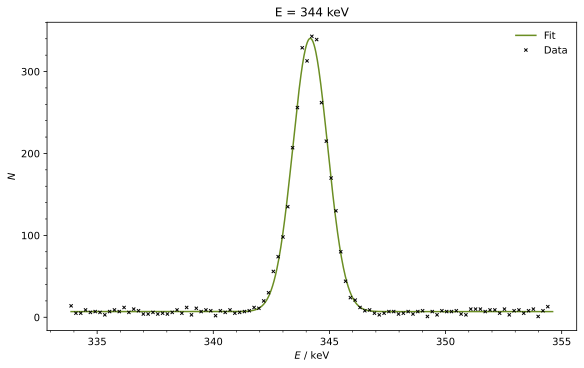

Gaussian Fit:

b =    5.097 +- 0.304
m =  410.962 +- 0.058
s =    0.812 +- 0.060
N =   41.521 +- 2.875


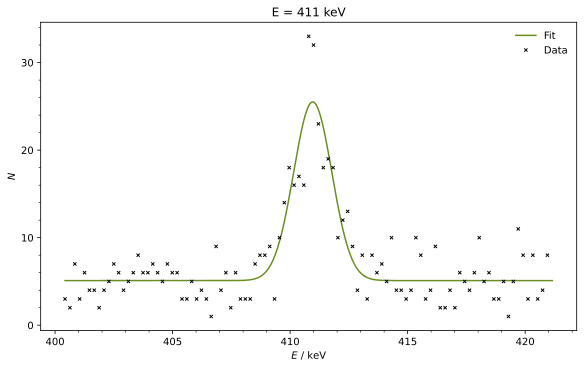

Gaussian Fit:

b =    4.717 +- 0.295
m =  443.736 +- 0.040
s =    0.829 +- 0.041
N =   60.397 +- 2.817


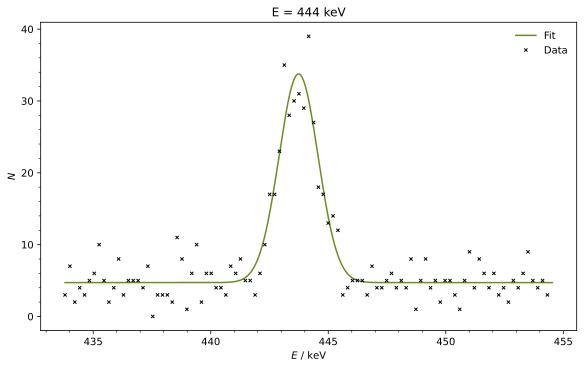

Gaussian Fit:

b =    3.103 +- 0.409
m =  778.796 +- 0.042
s =    1.216 +- 0.045
N =  132.619 +- 4.732


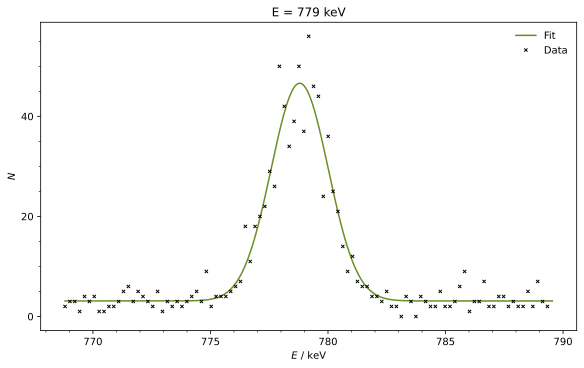

Gaussian Fit:

b =    3.829 +- 0.319
m =  867.009 +- 0.109
s =    1.196 +- 0.117
N =   38.586 +- 3.657


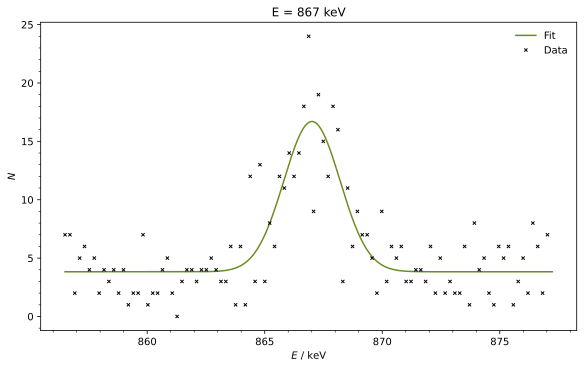

Gaussian Fit:

b =    2.151 +- 0.348
m =  963.780 +- 0.046
s =    1.263 +- 0.050
N =  106.944 +- 4.108


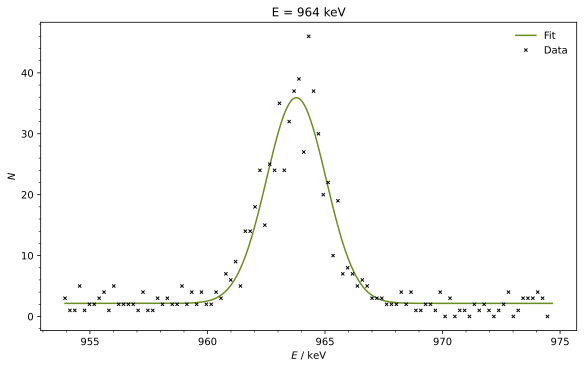

Gaussian Fit:

b =    2.293 +- 0.248
m = 1085.549 +- 0.058
s =    1.449 +- 0.063
N =   72.086 +- 3.140


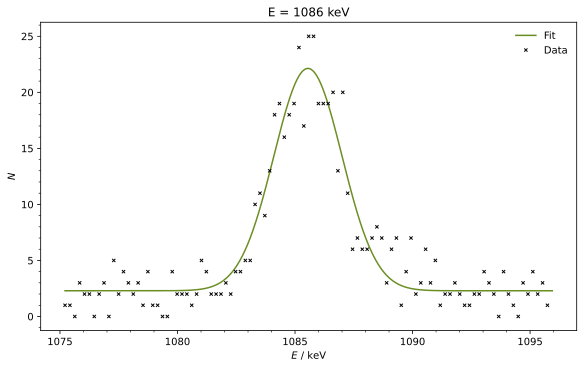

Gaussian Fit:

b =    1.323 +- 0.367
m = 1111.784 +- 0.060
s =    1.411 +- 0.066
N =   98.834 +- 4.582


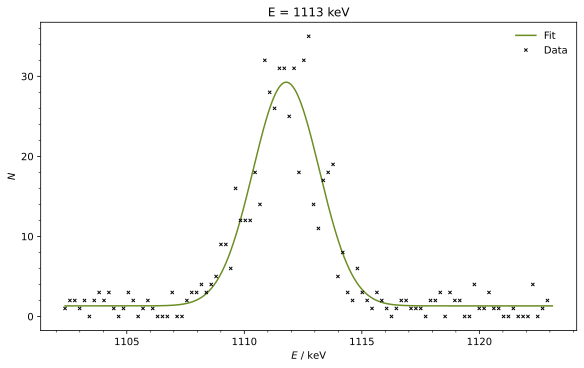

Gaussian Fit:

b =    0.409 +- 0.373
m = 1407.634 +- 0.065
s =    1.647 +- 0.073
N =  111.751 +- 5.032


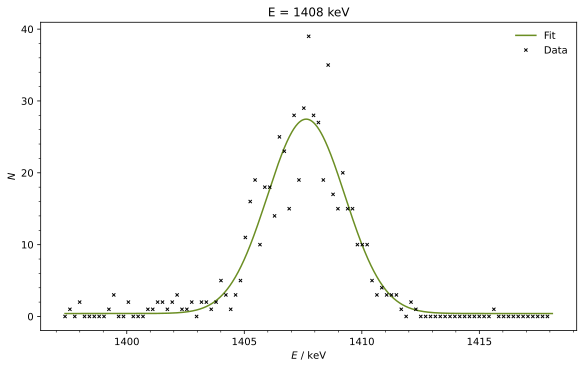

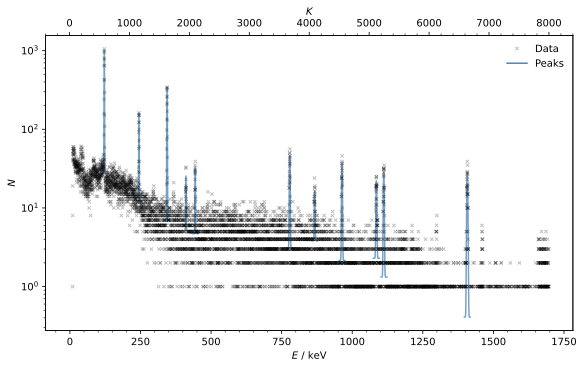

In [6]:
def gaussbg(x, b, m, s, N):
    return b + N / np.sqrt(2 * np.pi * s**2) * np.e**(-(x - m)**2 / (2 * s**2))

fits = [None] * len(eu_peak_ass)

i = 0

for row in zip(eu_K_peak_ass, eu_K_peak_ass_in_E, eu_peak_ass):
    K_lo = row[0] - 50
    K_hi = row[0] + 50

    m0 = row[1]
    N0 = row[2]

    par, cov = curve_fit(gaussbg, eu_K_in_E[K_lo:K_hi], eu[K_lo:K_hi], p0=[1, m0, 1, N0])
    err = np.sqrt(np.diag(cov))
    
    fit = uar(par, err)
    fits[i] = fit

    print(f'Gaussian Fit:\n')
    print(f'b = {fit[0].n:8.3f} +- {fit[0].s:5.3f}')
    print(f'm = {fit[1].n:8.3f} +- {fit[1].s:5.3f}')
    print(f's = {fit[2].n:8.3f} +- {fit[2].s:5.3f}')
    print(f'N = {fit[3].n:8.3f} +- {fit[3].s:5.3f}')

    x = np.linspace(eu_K_in_E[K_lo], eu_K_in_E[K_hi], 1000)
    
    plt.plot(x, gaussbg(x, *noms(fit)), c='olivedrab', label='Fit')
    plt.plot(eu_K_in_E[K_lo:K_hi], eu[K_lo:K_hi], 'kx', ms=3.21, label='Data')
    
    plt.locator_params(axis='x', nbins=8)
    plt.locator_params(axis='y', nbins=6)
    
    plt.xlabel(r'$E$ / keV')
    plt.ylabel(r'$N$')
    plt.title(f'E = {m0:.0f} keV')
    plt.legend()

    plt.show()
    plt.close()
    
    i += 1

fits = np.array(fits)

j = 0

for row in eu_K_peak_ass:
    K_lo = row - 50
    K_hi = row + 50
    
    x = np.linspace(eu_K_in_E[K_lo], eu_K_in_E[K_hi], 100)
    
    plt.plot(x, gaussbg(x, *noms(fits[j,:])), c='steelblue', alpha=0.75)
    
    j += 1

plt.plot(eu_K_in_E, eu, 'kx', ms=3.21, alpha=0.25, label='Data')

plt.yscale('log')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([-10000, -9999], [0, 0], c='steelblue', label='Peaks')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.gca().twiny()
plt.plot(eu_K[[0, 8000]], eu[[0, 8000]], alpha=0)

plt.xlabel(r'$K$')
plt.yscale('log')

plt.show()
plt.close()

##### Effizienz fitten

Nonlinear Fit:

a = 1.2533 +- 0.0446
b = 0.9956 +- 0.0002
c = 0.1012 +- 0.0079


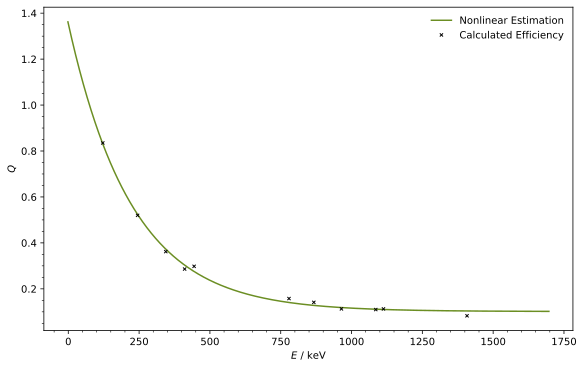

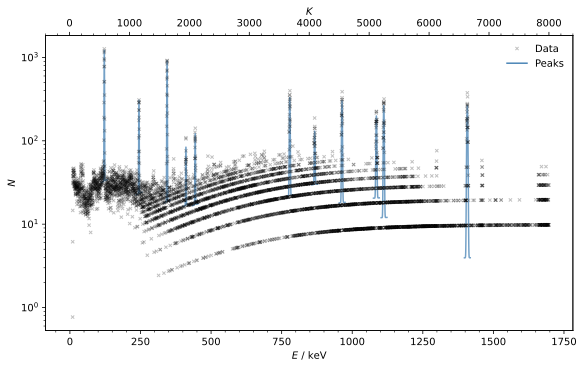

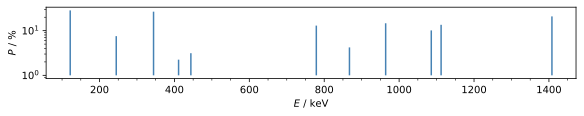

In [7]:
def Q(N, A, t, W, Om):
    return N / (A * t * W) * 4 * np.pi / Om

eu_N = fits[:,3]
eu_A = ufloat(1233, 18)

d = 70 + 15
r = 22.5
Om = (1 - d / np.sqrt(d**2 + r**2)) / 2

eu_Q = Q(eu_N, eu_A, t_eu, eu_P_ass, Om)

def fit(x, a, b, c):
    return a * b**x + c

par, cov = curve_fit(fit, eu_K_peak_ass_in_E, noms(eu_Q), p0=[1, 0.999, 0.1])
err = np.sqrt(np.diag(cov))

q = uar(par, err)

print(f'Nonlinear Fit:\n')
print(f'a = {q[0].n:.4f} +- {q[0].s:.4f}')
print(f'b = {q[1].n:.4f} +- {q[1].s:.4f}')
print(f'c = {q[2].n:.4f} +- {q[2].s:.4f}')

def trueN(N, E):
    return N / fit(E, *noms(q))

x = np.linspace(eu_K_in_E[0], eu_K_in_E[-1], 1000)

plt.plot(x, fit(x, *noms(q)), c='olivedrab', label='Nonlinear Estimation')
plt.plot(eu_K_peak_ass_in_E, noms(eu_Q), 'kx', ms=3.21, label='Calculated Efficiency')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$Q$')
plt.legend()

plt.show()
plt.close()

j = 0

for row in eu_K_peak_ass:
    K_lo = row - 50
    K_hi = row + 50
    
    x = np.linspace(eu_K_in_E[K_lo], eu_K_in_E[K_hi], 100)
    
    plt.plot(x, trueN(gaussbg(x, *noms(fits[j,:])), x), c='steelblue', alpha=0.75)
    
    j += 1

plt.plot(eu_K_in_E, trueN(eu, eu_K_in_E), 'kx', ms=3.21, alpha=0.25, label='Data')

plt.yscale('log')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([-10000, -9999], [0, 0], c='steelblue', label='Peaks')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.gca().twiny()
plt.plot(eu_K[[0, 8000]], eu[[0, 8000]], alpha=0)

plt.xlabel(r'$K$')
plt.yscale('log')

plt.show()
plt.close()

plt.figure(figsize=[8, 1.5])

plt.vlines(eu_E_ass, 1, eu_P_ass * 100, color='steelblue')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$P$ / %')
plt.yscale('log')

plt.show()
plt.close()

#### Cs-137

##### Spektrum plotten

FEP:

Experiment E = 661.22 keV
Literature E = 661.66 keV


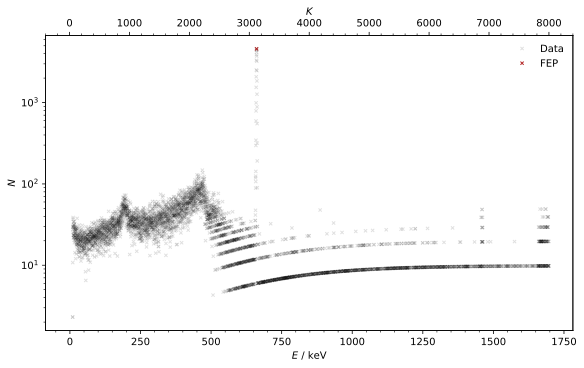

In [10]:
cs_K = np.arange(len(cs))
cs_E = E(cs_K)
cs_N = trueN(cs, cs_E)

fep_K = find_peaks(cs, prominence=100)[0][0]
fep_E = E(fep_K)
fep_N = cs_N[fep_K]

fep_lit = 661.660

print(f'FEP:\n')
print(f'Experiment E = {fep_E:.2f} keV')
print(f'Literature E = {fep_lit:.2f} keV')

plt.plot(cs_E, cs_N, 'kx', ms=3.21, alpha=0.125, label='Data')
plt.plot(fep_E, cs_N[fep_K], 'x', c='firebrick', ms=3.21, label='FEP')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.gca().twiny()
plt.plot(cs_K[[0, 8000]], cs_N[[0, 8000]], alpha=0)

plt.xlabel(r'$K$')
plt.yscale('log')

plt.show()
plt.close()

##### Photopeak messen

Gaussian Fit:

b =    11.168 +-  3.234
m =   661.182 +-  0.004
s =     0.944 +-  0.004
N = 11003.206 +- 40.398

FWHM: 2.28 keV
FWTM: 4.15 keV

Ratio: FWTM / FWHM

Measurement 1.818
     Theory 1.823


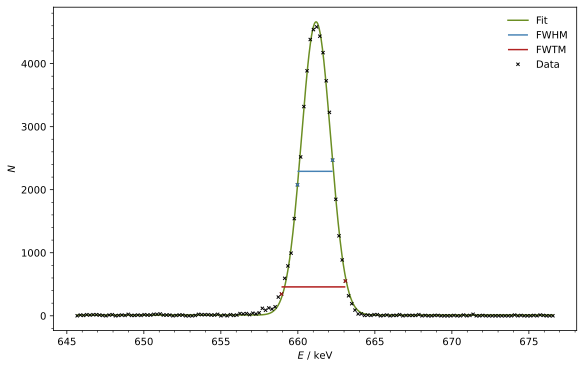

In [11]:
cs_E_fep = cs_E[fep_K - 75:fep_K + 75]
cs_N_fep = cs_N[fep_K - 75:fep_K + 75]

par, cov = curve_fit(gaussbg, cs_E_fep, cs_N_fep, p0=(1, fep_E, 1, fep_N))
err = np.sqrt(np.diag(cov))

fep_fit = uar(par, err)

print(f'Gaussian Fit:\n')
print(f'b = {fep_fit[0].n:9.3f} +- {fep_fit[0].s:6.3f}')
print(f'm = {fep_fit[1].n:9.3f} +- {fep_fit[1].s:6.3f}')
print(f's = {fep_fit[2].n:9.3f} +- {fep_fit[2].s:6.3f}')
print(f'N = {fep_fit[3].n:9.3f} +- {fep_fit[3].s:6.3f}')

x = np.linspace(cs_E_fep[0], cs_E_fep[-1], 1000)

hm_lo = fep_K - 6
hm_hi = fep_K + 5

tm_lo = fep_K - 11
tm_hi = fep_K + 9

fwhm_exp = cs_E[hm_hi] - cs_E[hm_lo]
fwtm_exp = cs_E[tm_hi] - cs_E[tm_lo]

print()
print(f'FWHM: {fwhm_exp:.2f} keV')
print(f'FWTM: {fwtm_exp:.2f} keV')
print()

fwhm_the = 2 * unp.sqrt(2 * np.log(2)) * fep_fit[1]
fwtm_the = 2 * unp.sqrt(2 * np.log(10)) * fep_fit[1]

rat_exp = fwtm_exp / fwhm_exp
rat_the = np.sqrt(np.log(10) / np.log(2))

print(f'Ratio: FWTM / FWHM\n')
print(f'Measurement {rat_exp:.3f}')
print(f'     Theory {rat_the:.3f}')

plt.plot(x, gaussbg(x, *noms(fep_fit)), c='olivedrab', label='Fit')
plt.hlines(fep_N / 2, cs_E[fep_K - 6], cs_E[fep_K + 5], color='steelblue', label='FWHM')
plt.hlines(fep_N / 10, cs_E[fep_K - 11], cs_E[fep_K + 9], color='firebrick', label='FWTM')
plt.plot(cs_E_fep, cs_N_fep, 'kx', ms=3.21, label='Data')

plt.plot(cs_E[[hm_lo, hm_hi]], cs_N[[hm_lo, hm_hi]], 'x', ms=3.21, c='steelblue')
plt.plot(cs_E[[tm_lo, tm_hi]], cs_N[[tm_lo, tm_hi]], 'x', ms=3.21, c='firebrick')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.show()
plt.close()

##### Comptonbereich messen

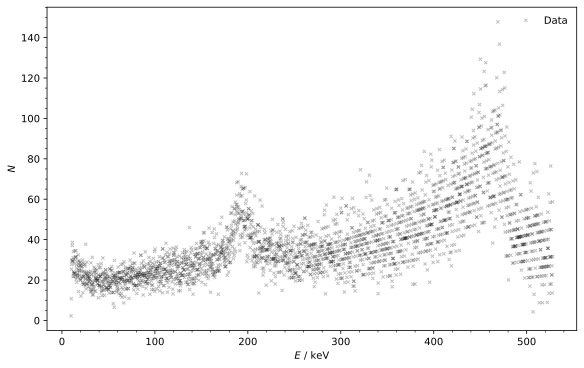

In [23]:
cs_E_comp = cs_E[54:2554]
cs_N_comp = cs_N[54:2554]

def difCR(E, a):
    c = const.c
    m = const.m_e
    e = const.e
    m_E = m * c**2 / e
    r = 1000 * fep_E / (m_E)
    return a * (2 - 2 * E)

plt.plot(cs_E_comp, cs_N_comp, 'kx', ms=3.21, alpha=0.25, label='Data')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.show()
plt.close()